In [109]:
# import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [68]:
#  Import and read the csv.
data_df = pd.read_csv("Triangle_role/Resources/sample_data.csv")
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
0,2017,1001,"Autauga County,Alabama",1,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186712,2
1,2017,1001,"Autauga County,Alabama",2,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186577,2
2,2017,1001,"Autauga County,Alabama",3,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186397,2
3,2017,1001,"Autauga County,Alabama",4,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186839,2
4,2017,1001,"Autauga County,Alabama",5,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,187155,2


Data Cleaning

In [69]:
# Drop the null columns where all values are null
data_df = data_df.dropna(axis='columns', how='all')
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
0,2017,1001,"Autauga County,Alabama",1,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186712,2
1,2017,1001,"Autauga County,Alabama",2,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186577,2
2,2017,1001,"Autauga County,Alabama",3,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186397,2
3,2017,1001,"Autauga County,Alabama",4,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186839,2
4,2017,1001,"Autauga County,Alabama",5,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,187155,2


In [70]:
# Drop the null rows
data_df = data_df.dropna()
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
0,2017,1001,"Autauga County,Alabama",1,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186712,2
1,2017,1001,"Autauga County,Alabama",2,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186577,2
2,2017,1001,"Autauga County,Alabama",3,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186397,2
3,2017,1001,"Autauga County,Alabama",4,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186839,2
4,2017,1001,"Autauga County,Alabama",5,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,187155,2


In [71]:
#Using drop() to delete rows based on column value
data_df.drop(data_df[data_df['cases'] < 1].index, inplace = True)

In [73]:
#Using drop() to delete rows based on column value
data_df.drop(data_df[data_df['Year'] < 2019].index, inplace = True)

In [74]:
data_df

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
38,2020,1001,"Autauga County,Alabama",3,43,29804,58877,0.953256,28734,30143,...,44580,12136,281,690,66,1124,57009,1868,208884,2
39,2020,1001,"Autauga County,Alabama",4,731,29804,58877,0.953256,28734,30143,...,44580,12136,281,690,66,1124,57009,1868,209394,2
40,2020,1001,"Autauga County,Alabama",5,3660,29804,58877,0.953256,28734,30143,...,44580,12136,281,690,66,1124,57009,1868,210039,2
41,2020,1001,"Autauga County,Alabama",6,11110,29804,58877,0.953256,28734,30143,...,44580,12136,281,690,66,1124,57009,1868,210767,2
42,2020,1001,"Autauga County,Alabama",7,24241,29804,58877,0.953256,28734,30143,...,44580,12136,281,690,66,1124,57009,1868,211439,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021,42007,"Beaver County,Pennsylvania",8,503573,34269,166624,0.963146,81748,84876,...,150097,10948,308,1022,79,4170,163219,3405,167795,1
236,2021,42007,"Beaver County,Pennsylvania",9,546233,34269,166624,0.963146,81748,84876,...,150097,10948,308,1022,79,4170,163219,3405,169895,1
237,2021,42007,"Beaver County,Pennsylvania",10,654491,34269,166624,0.963146,81748,84876,...,150097,10948,308,1022,79,4170,163219,3405,171950,1
238,2021,42007,"Beaver County,Pennsylvania",11,724563,34269,166624,0.963146,81748,84876,...,150097,10948,308,1022,79,4170,163219,3405,173980,1


In [75]:
data_df.dtypes

Year                int64
FIPS                int64
C_S                object
month               int64
cases               int64
Pcincome            int64
POPESTIMATE         int64
MFratio           float64
POPEST_MALE         int64
POPEST_FEM          int64
MEDIAN_AGE_TOT    float64
UNDER5_TOT          int64
AGE513_TOT          int64
AGE1544_TOT         int64
AGE4564_TOT         int64
AGE65PLUS_TOT       int64
WA                  int64
BA                  int64
IA                  int64
AA                  int64
NA                  int64
TOM                 int64
NH                  int64
H                   int64
Cost                int64
RUCC                int64
dtype: object

In [93]:
cases_cost_df = data_df[["cases","Cost"]]
cases_cost_df

,cases,Cost
38,43,208884
39,731,209394
40,3660,210039
41,11110,210767
42,24241,211439
...,...,...
235,503573,167795
236,546233,169895
237,654491,171950
238,724563,173980


In [95]:
cases_cost_df["cases"] = cases_cost_df["cases"] / 1000

C:\Users\dog\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
cases_cost_df["Cost"] = cases_cost_df["Cost"] / 1000

C:\Users\dog\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


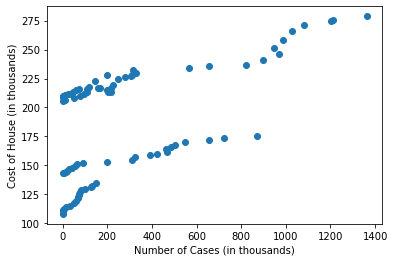

In [98]:
# comparing cases to cost
plt.scatter(cases_cost_df.cases, cases_cost_df.Cost)
plt.xlabel('Number of Cases (in thousands)')
plt.ylabel('Cost of House (in thousands)')
plt.show()

In [132]:
X = cases_cost_df.cases.values.reshape(-1, 1)

In [133]:
# we assign the target variable, or the Salary column, to y
y = cases_cost_df.Cost

In [101]:
# create an instance of the linear regression model
model = LinearRegression()

In [102]:
model.fit(X, y)

LinearRegression()

In [103]:
# the predict() method is used to generate predictions: 
# given any number of a person's years of experience, the model will predict the salary:
y_pred = model.predict(X)

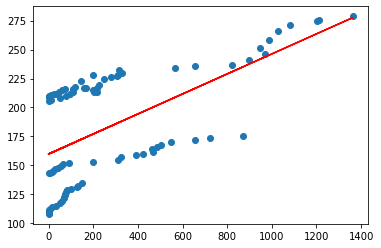

In [104]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [106]:
print(model.coef_)
print(model.intercept_)

[0.08647285]
159.80488944120563


In [107]:
plt.savefig("linear_regression.png")

<Figure size 432x288 with 0 Axes>

In [120]:
cases_cost_copy_df = data_df[["cases","Cost"]]
cases_cost_copy_df

,cases,Cost
38,43,208884
39,731,209394
40,3660,210039
41,11110,210767
42,24241,211439
...,...,...
235,503573,167795
236,546233,169895
237,654491,171950
238,724563,173980


In [121]:
# creating the scaler instance
data_scaler = StandardScaler()

In [125]:
# Fitting the scaler
cases_cost_scaled = data_scaler.fit_transform(cases_cost_copy_df)


In [127]:
cases_cost_scaled = pd.DataFrame(cases_cost_scaled, columns=cases_cost_copy_df.columns)
cases_cost_scaled

,cases,Cost
0,-0.808346,0.519235
1,-0.806322,0.529697
2,-0.797707,0.542928
3,-0.775792,0.557862
4,-0.737167,0.571646
...,...,...
82,0.672811,-0.323627
83,0.798297,-0.280550
84,1.116743,-0.238395
85,1.322863,-0.196754


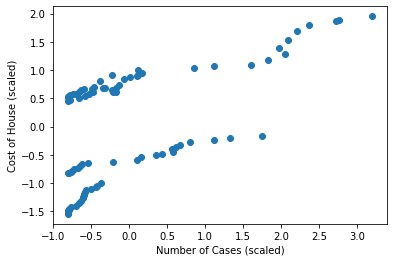

In [128]:
# comparing cases to cost SCALED
plt.scatter(cases_cost_scaled.cases, cases_cost_scaled.Cost)
plt.xlabel('Number of Cases (scaled)')
plt.ylabel('Cost of House (scaled)')
plt.show()

In [134]:
X2 = cases_cost_scaled.cases.values.reshape(-1, 1)

In [135]:
# we assign the target variable, or the cost column, to y
y2 = cases_cost_scaled.Cost

In [136]:
model.fit(X2, y2)

LinearRegression()

In [137]:
# the predict() method is used to generate predictions: 
# given any number of a person's years of experience, the model will predict the salary:
y2_pred = model.predict(X2)

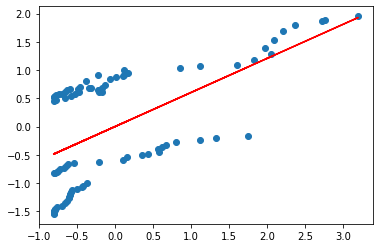

In [138]:
plt.scatter(X2, y2)
plt.plot(X2, y2_pred, color='red')
plt.show()

In [139]:
print(model.coef_)
print(model.intercept_)

[0.60302519]
2.5315508605247155e-16


In [140]:
plt.savefig("scaled_linear_regression.png")

<Figure size 432x288 with 0 Axes>